In [12]:
import tensorflow as tf
import os

In [13]:
current_directory = os.getcwd()

In [14]:
train_path = os.path.join(current_directory,"dataset","Train")
test_path = os.path.join(current_directory,"dataset","Test")

In [15]:
valid_path = os.path.join(current_directory,"dataset","Valid")

In [16]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    image_size = (128,128),
    shuffle = True,
    interpolation = "bilinear"
)

Found 900 files belonging to 3 classes.


In [17]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    image_size = (128,128),
    shuffle = True,
    interpolation = "bilinear"
)

Found 300 files belonging to 3 classes.


In [18]:
labels = training_set.class_names
labels

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [19]:
cnn = tf.keras.models.Sequential()
#activation
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding='same', activation='relu', input_shape=[128,128,3])) #width, height, rgb
#pooling
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,padding='same', activation='relu'))
#padding
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#more layers the better
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3,padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3,padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#more layers the better
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


#11 march 2025
#pruning is cutting down the decision trees, to minimize noise, but in cnn overfitting is handled by dropout layer or early stopping
#the no. of epochs given at 100 is stopped at 14, accuracy incr and loss decreases. loss function is error function.
#this applies to both cnn and ann

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu')) #1.5k neurons
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

c:\Users\Asus\Python\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=['accuracy'])

In [21]:
cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │    12,289,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,006,227 (64.87 MB)

 Trainable params: 17,006,227 (64.87 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 941ms/step - accuracy: 0.3411 - loss: 2.0448 - val_accuracy: 0.5700 - val_loss: 1.0142
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 807ms/step - accuracy: 0.5438 - loss: 0.9521 - val_accuracy: 0.4600 - val_loss: 1.0908
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 778ms/step - accuracy: 0.5351 - loss: 1.0143 - val_accuracy: 0.8033 - val_loss: 0.4647
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 838ms/step - accuracy: 0.7912 - loss: 0.4622 - val_accuracy: 0.8133 - val_loss: 0.4083
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 822ms/step - accuracy: 0.8672 - loss: 0.3106 - val_accuracy: 0.8967 - val_loss: 0.2625
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 946ms/step - accuracy: 0.9284 - loss: 0.1801 - val_accuracy: 0.9200 - val_loss: 0.1937
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 820ms/step - accuracy: 0.9360 - loss: 0.1460 - val_accuracy: 0.9567 - val_loss: 0.1502
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 800ms/step - accuracy: 0.9655 - loss: 0.1242 - val_accu

In [ ]:
train_loss, train_acc = cnn.evaluate(training_set)
print("Training accuracy:",train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - accuracy: 0.9838 - loss: 0.0691
Training accuracy: 0.9833333492279053


In [24]:
val_loss, val_acc = cnn.evaluate(validation_set)
print("Validation accuracy: ",val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.9538 - loss: 0.1460
Validation accuracy:  0.9433333277702332


In [25]:
cnn.save('trained_plant_disease_model.keras')

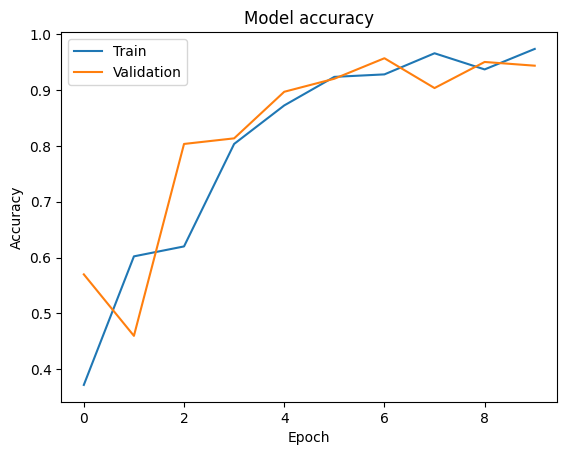

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()